# Communicate Data Findings Project


# Ford GoBike System

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sb
import csv
import math
from matplotlib import pyplot as plt
from matplotlib import *
import sys
import pylab as pl
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib.pyplot import figure

In [23]:
data = pd.read_csv(r'201902-fordgobike-tripdata.txt')
print(data.shape)
data.head(1)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [26]:
data = data.dropna()
data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [27]:
data.start_time = pd.to_datetime(data.start_time)
data['start_hr'] = data['start_time'].dt.hour
data['start_hr'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hr, dtype: int64

In [28]:
data['age'] = 2021 - data['member_birth_year']
data['age'].value_counts()

33.0     10214
28.0      9323
32.0      8967
31.0      8640
30.0      8484
29.0      8245
34.0      8010
35.0      7953
27.0      7654
26.0      7420
36.0      7023
37.0      6557
38.0      5953
41.0      5011
39.0      4987
25.0      4637
40.0      4344
42.0      3756
24.0      3476
23.0      3208
43.0      2830
44.0      2706
47.0      2633
22.0      2504
46.0      2503
45.0      2435
48.0      2080
53.0      1927
50.0      1924
49.0      1909
         ...  
67.0       301
69.0       189
70.0       180
71.0       178
68.0       158
74.0       135
66.0       134
76.0       105
72.0        99
90.0        89
121.0       53
73.0        51
20.0        34
78.0        30
79.0        21
88.0        20
75.0        19
82.0        11
119.0       11
80.0         9
120.0        6
83.0         3
101.0        3
77.0         2
87.0         2
143.0        1
93.0         1
91.0         1
111.0        1
94.0         1
Name: age, Length: 75, dtype: int64

In [29]:
data['duration_hrs'] = data['duration_sec']/3600
data['duration_hrs'].value_counts()

0.075556     308
0.089722     285
0.084722     282
0.102500     280
0.076111     276
0.085000     276
0.098333     275
0.090000     275
0.105556     274
0.095556     274
0.107500     273
0.082500     273
0.095278     270
0.093333     269
0.075000     269
0.073333     269
0.101667     269
0.090278     268
0.093611     267
0.087500     267
0.091389     267
0.094722     266
0.123333     266
0.074722     264
0.104722     264
0.094167     264
0.077778     264
0.088333     263
0.106667     263
0.079722     263
            ... 
1.477222       1
16.325278      1
0.963056       1
2.767778       1
1.376111       1
10.136111      1
3.226667       1
1.330556       1
2.395278       1
4.942778       1
1.734167       1
6.026111       1
3.628056       1
9.446667       1
0.920833       1
1.216667       1
1.533889       1
0.959444       1
0.736389       1
1.951944       1
3.465278       1
0.943333       1
0.864722       1
1.183333       1
1.063056       1
1.891389       1
14.495833      1
1.242778      

The pie graph shows the number of users were the male has the higher percentage number of users compared to female and others

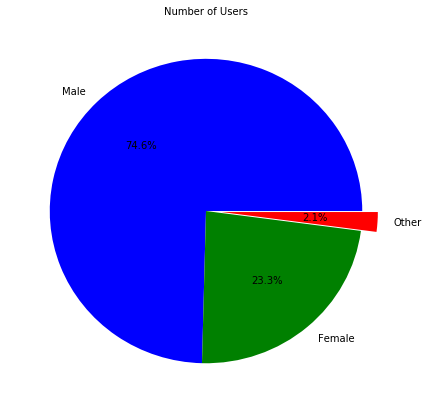

In [40]:
labels=data['member_gender'].value_counts().index
colors=['blue','green','red']
explode=[0,0,0.1]
values=data['member_gender'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Gender of Customers',fontsize=10)
plt.show()

The plot graph shows that the female has more count compared to the male and others between the relation between age and gender

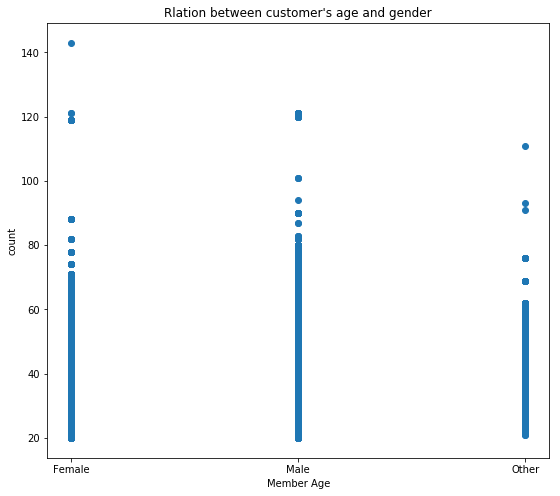

In [41]:
pl.figure(figsize =[9,8])
pl.scatter(y = data['age'], x = data['member_gender'])
pl.title('Rlation between customer\'s age and gender');
pl.xlabel('Gender');
pl.ylabel('Age');

The bar chart illustrates that more male users than female and others

Text(0,0.5,'Users')

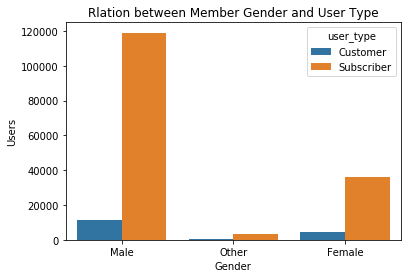

In [11]:
sb.countplot(data = data, x = 'member_gender', hue = 'user_type');
plt.title('Rlation between Customer Gender and User Type');
plt.xlabel('Gender')
plt.ylabel('Customer')

The plot represents the relation between age  and user type

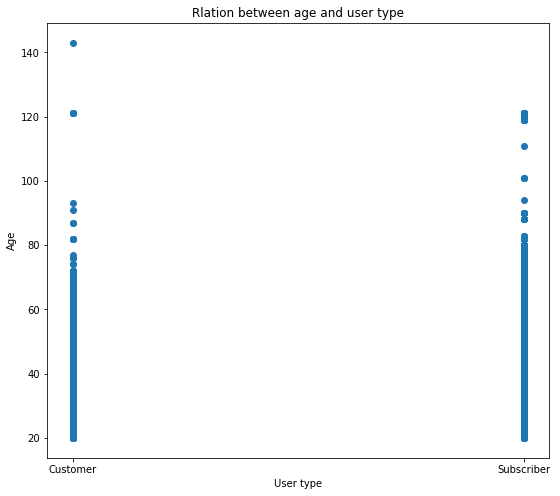

In [42]:
pl.figure(figsize =[9,8])
pl.scatter(y = data['age'], x = data['user_type'])
pl.title('Rlation between age and user type');
pl.xlabel('User type');
pl.ylabel('Age');

The bar chart shows how many hours the users use the bike

Text(0,0.5,'Number of Users')

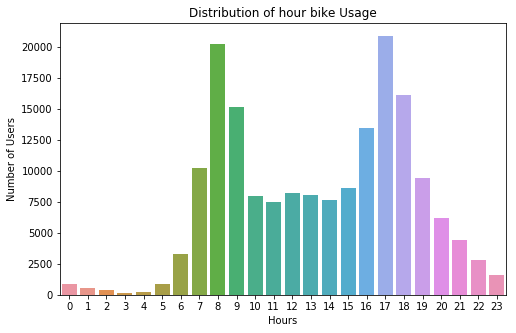

In [13]:
plt.figure(figsize=[ 8, 5]);
plt.title('Distribution of hour bike Usage')
sb.countplot(data=data, x='start_hr');
plt.xlabel('Hours')
plt.ylabel('Number of Users')

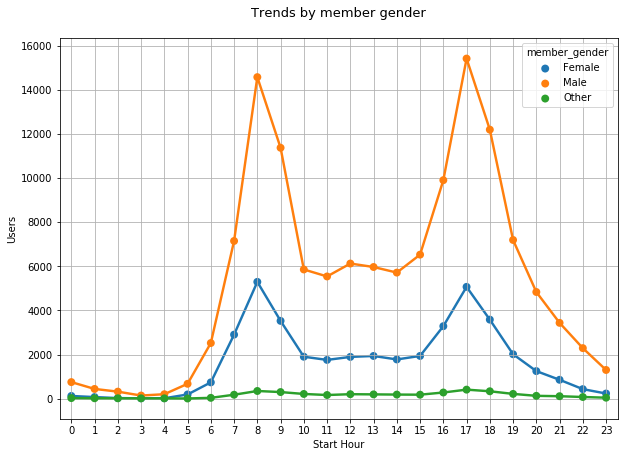

In [10]:
pl.figure(figsize=[ 10, 7]);
x = sb.pointplot(data=data.groupby(['start_hr', 'member_gender']).size().reset_index(),scale=.9, x='start_hr', y=0, hue = 'member_gender');
pl.title('Relation between Gender and start hour of the ride', y=1.04, fontsize=13)
pl.xlabel('Start Hour')
pl.ylabel('Customers');
pl.grid()


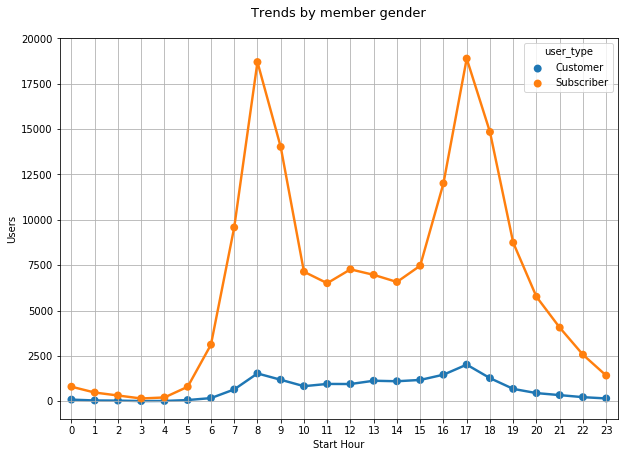

In [43]:
pl.figure(figsize=[ 10, 7]);
x = sb.pointplot(data=data.groupby(['start_hr', 'user_type']).size().reset_index(),scale=.9, x='start_hr', y=0, hue = 'user_type');
pl.title('Relation between user type and start hour of the ride', y=1.04, fontsize=13)
pl.xlabel('Start Hour')
pl.ylabel('Users');
pl.grid()

Text(0,0.5,'member_gender')

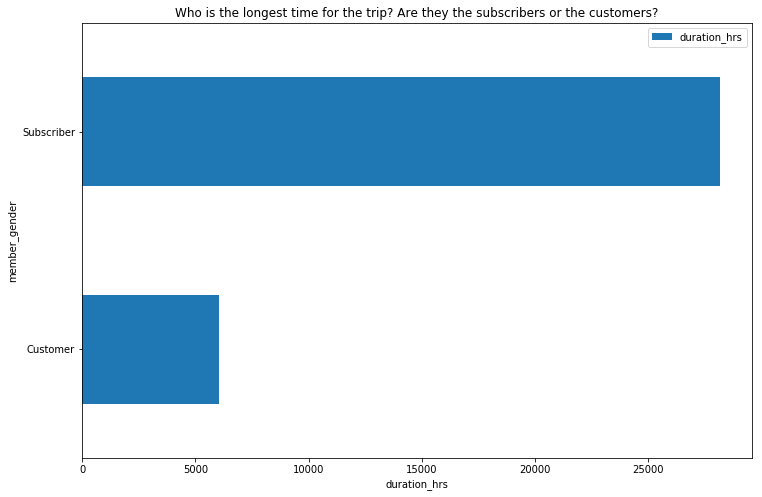

In [44]:
plt =pd.DataFrame(data.groupby('user_type')['duration_hrs'].sum()).plot(kind='barh', figsize=(12,8))

plt.set_title('The subscribers or the customers has  the longest trip duration', fontsize=12)
plt.set_xlabel('duration_hrs')
plt.set_ylabel('member_gender')

Text(0,0.5,'member_gender')

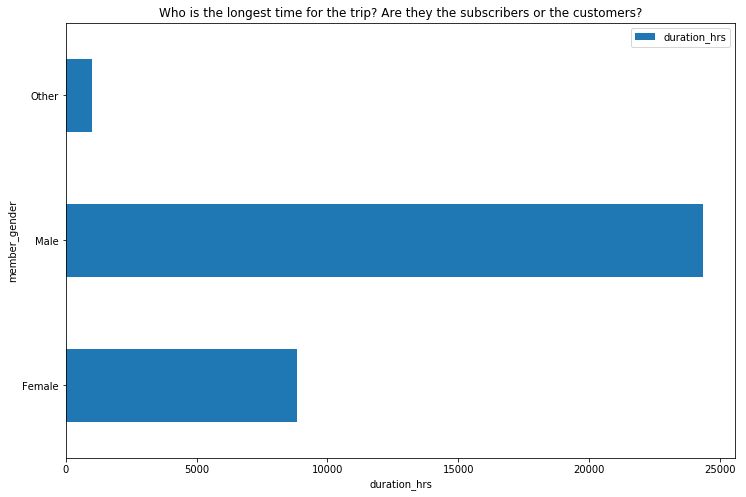

In [45]:
plt =pd.DataFrame(data.groupby('member_gender')['duration_hrs'].sum()).plot(kind='barh', figsize=(12,8))

plt.set_title('Who has the longest trip duration', fontsize=12)
plt.set_xlabel('duration_hrs')
plt.set_ylabel('member_gender')